In [1]:
import pandas as pd
import numpy as np

# Helper Functions
import wrangle as w 
import explore as exp
from explore import rfe, split, select_kbest

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Hypothesis tests
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

#Feature Engineering
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import RFE
from scipy import stats

# Split data
from sklearn.model_selection import train_test_split

# Evaluate models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support 

# Create models for classification ML:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [2]:
df = w.wrangle_data(cached=False)

In [3]:
df.isnull().sum()

age                                            0
gender                                         0
race                                           0
date                                           0
city                                           0
state                                          0
zipcode                                        0
county                                         0
agency_responsible                             0
cause_of_death                                 0
description_of_circumstances                   0
official_disposition                           0
criminal_charges_filed                         0
mental_illness                                 0
armed_unarmed_status                           0
alleged_weapon                                 0
alleged_threat_lvl                             0
fleeing                                        0
body_camera                                    0
geography                                      0
encounter_type_draft

In [4]:
df.age.value_counts()

25     280
0      279
27     275
28     275
31     275
      ... 
88       1
93       1
85       1
107      1
95       1
Name: age, Length: 88, dtype: int64

In [5]:
df.age_bins.value_counts()

25-34       2697
35-44       2005
18-24       1289
45-54       1278
55-64        652
unknown      279
65+          267
12-17        155
under 12      12
Name: age_bins, dtype: int64

In [6]:
df.columns

Index(['age', 'gender', 'race', 'date', 'city', 'state', 'zipcode', 'county',
       'agency_responsible', 'cause_of_death', 'description_of_circumstances',
       'official_disposition', 'criminal_charges_filed', 'mental_illness',
       'armed_unarmed_status', 'alleged_weapon', 'alleged_threat_lvl',
       'fleeing', 'body_camera', 'geography', 'encounter_type_draft',
       'initial_reported_reason_for_encounter_draft',
       'known_past_shootings_of_officer_draft', 'is_female', 'is_male',
       'is_transgender', 'was_fleeing', 'was_not fleeing ',
       'was_allegedly_armed', 'was_unarmed', 'was_vehicle',
       'was_domestic_disturbance', 'was_mental_health_welfare_check',
       'was_person_with_a_weapon', 'was_traffic_stop',
       'was_violent_crime_part_1', 'is_asian/pacific islander', 'is_black',
       'is_hispanic', 'is_native american', 'is_unknown race', 'is_white',
       'mntlill_drug or alcohol use', 'mntlill_no', 'mntlill_unknown',
       'mntlill_yes', 'rural', 'su

In [7]:
from explore import rfe, split, select_kbest

In [8]:
train, validate, test = split(df, stratify_by='alleged_threat_lvl')

In [9]:

def split_df(df, target, seed):
    '''
    split_df will take one argument(df) and 
    then split our data into 20/80, 
    then split the 80% into 30/70
    performs a train, validate, test split
    splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 6 dataframes and 3 series:
    train, validate, test split, X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # Train, Validate, and test
    train_and_validate, test = train_test_split(df, test_size=0.2, random_state=seed)
    train, validate = train_test_split(train_and_validate, test_size=0.3, random_state=seed)
    # Split with X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test 

In [10]:

train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_df(df, 'alleged_threat_lvl', 42)

In [11]:
#y_

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4834 entries, 5595 to 5633
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   age                                          4834 non-null   int64         
 1   gender                                       4834 non-null   object        
 2   race                                         4834 non-null   object        
 3   date                                         4834 non-null   datetime64[ns]
 4   city                                         4834 non-null   object        
 5   state                                        4834 non-null   object        
 6   zipcode                                      4834 non-null   float64       
 7   county                                       4834 non-null   object        
 8   agency_responsible                           4834 non-null   object        

In [13]:
from sklearn.feature_selection import f_regression, RFE, SelectKBest

In [14]:
list(df.columns)

['age',
 'gender',
 'race',
 'date',
 'city',
 'state',
 'zipcode',
 'county',
 'agency_responsible',
 'cause_of_death',
 'description_of_circumstances',
 'official_disposition',
 'criminal_charges_filed',
 'mental_illness',
 'armed_unarmed_status',
 'alleged_weapon',
 'alleged_threat_lvl',
 'fleeing',
 'body_camera',
 'geography',
 'encounter_type_draft',
 'initial_reported_reason_for_encounter_draft',
 'known_past_shootings_of_officer_draft',
 'is_female',
 'is_male',
 'is_transgender',
 'was_fleeing',
 'was_not fleeing ',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_domestic_disturbance',
 'was_mental_health_welfare_check',
 'was_person_with_a_weapon',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'is_asian/pacific islander',
 'is_black',
 'is_hispanic',
 'is_native american',
 'is_unknown race',
 'is_white',
 'mntlill_drug or alcohol use',
 'mntlill_no',
 'mntlill_unknown',
 'mntlill_yes',
 'rural',
 'suburban',
 'urban',
 'cod_lethal',
 'age_bins',
 'unknown'

In [15]:
dropcols = ['date',
 'gender',
 'race',
 'city',
 'state',
 'zipcode',
 'county',
 'agency_responsible',
 'cause_of_death',
 'description_of_circumstances',
 'official_disposition',
 'criminal_charges_filed',
 'mental_illness',
 'armed_unarmed_status',
 'alleged_threat_lvl',
 'alleged_weapon',
 'fleeing',
 'geography',
 'encounter_type_draft',
 'initial_reported_reason_for_encounter_draft',
 'known_past_shootings_of_officer_draft',
 'age_bins']


In [16]:
train2 = train.drop(columns=dropcols)
validate2 = validate.drop(columns=dropcols)
test2 = test.drop(columns=dropcols)

In [17]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4834 entries, 5595 to 5633
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              4834 non-null   int64  
 1   body_camera                      4834 non-null   float64
 2   is_female                        4834 non-null   uint8  
 3   is_male                          4834 non-null   uint8  
 4   is_transgender                   4834 non-null   uint8  
 5   was_fleeing                      4834 non-null   float64
 6   was_not fleeing                  4834 non-null   float64
 7   was_allegedly_armed              4834 non-null   float64
 8   was_unarmed                      4834 non-null   float64
 9   was_vehicle                      4834 non-null   float64
 10  was_domestic_disturbance         4834 non-null   uint8  
 11  was_mental_health_welfare_check  4834 non-null   uint8  
 12  was_person_with_a

In [18]:
train2.columns

Index(['age', 'body_camera', 'is_female', 'is_male', 'is_transgender',
       'was_fleeing', 'was_not fleeing ', 'was_allegedly_armed', 'was_unarmed',
       'was_vehicle', 'was_domestic_disturbance',
       'was_mental_health_welfare_check', 'was_person_with_a_weapon',
       'was_traffic_stop', 'was_violent_crime_part_1',
       'is_asian/pacific islander', 'is_black', 'is_hispanic',
       'is_native american', 'is_unknown race', 'is_white',
       'mntlill_drug or alcohol use', 'mntlill_no', 'mntlill_unknown',
       'mntlill_yes', 'rural', 'suburban', 'urban', 'cod_lethal', 'unknown',
       'under 12', '12-17', '18-24', '25-34', '35-44', '45-54', '55-64',
       '65+'],
      dtype='object')

In [19]:
f_feature = select_kbest(train2, y_train, 15)
f_feature

['age',
 'body_camera',
 'is_female',
 'was_fleeing',
 'was_allegedly_armed',
 'was_unarmed',
 'was_domestic_disturbance',
 'was_mental_health_welfare_check',
 'was_person_with_a_weapon',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'mntlill_drug or alcohol use',
 'mntlill_no',
 'mntlill_unknown',
 '55-64']

In [20]:
rfe_list = rfe(train2, y_train, 15)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

In [21]:
f_feature

['age',
 'body_camera',
 'is_female',
 'was_fleeing',
 'was_allegedly_armed',
 'was_unarmed',
 'was_domestic_disturbance',
 'was_mental_health_welfare_check',
 'was_person_with_a_weapon',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'mntlill_drug or alcohol use',
 'mntlill_no',
 'mntlill_unknown',
 '55-64']

In [22]:
rfe_list

['is_male',
 'is_transgender',
 'was_fleeing',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'is_black',
 'is_native american',
 'is_white',
 'mntlill_drug or alcohol use',
 'mntlill_no',
 'cod_lethal',
 'under 12']

In [23]:
combo_feats = list(set(f_feature + rfe_list))

In [24]:
len(combo_feats)

23

In [25]:
combo_feats

['55-64',
 'is_native american',
 'mntlill_no',
 'under 12',
 'was_traffic_stop',
 'body_camera',
 'age',
 'was_allegedly_armed',
 'mntlill_unknown',
 'was_person_with_a_weapon',
 'is_black',
 'was_domestic_disturbance',
 'was_unarmed',
 'was_fleeing',
 'is_male',
 'cod_lethal',
 'was_mental_health_welfare_check',
 'is_white',
 'was_violent_crime_part_1',
 'was_vehicle',
 'mntlill_drug or alcohol use',
 'is_transgender',
 'is_female']

Modeling

Create a Baseline Model:

In [26]:
y_train = pd.DataFrame(y_train)

y_train.alleged_threat_lvl.value_counts()


0.0    2466
1.0    2368
Name: alleged_threat_lvl, dtype: int64

In [27]:
baseline = 0
baseline_accuracy = round((y_train.alleged_threat_lvl == baseline).mean(),4)
baseline_accuracy
print(f'Baseline accuracy is {baseline_accuracy}')

Baseline accuracy is 0.5101





Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# create the model 
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)



In [29]:
# fit the model
rf.fit(train2, y_train)


# Find feature importance
print(rf.feature_importances_)



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[1.96071945e-02 1.22853569e-02 4.84143166e-03 3.34139627e-03
 2.47178718e-04 3.00992294e-01 0.00000000e+00 1.89830391e-01
 6.81534886e-02 3.20080971e-03 4.36342151e-02 4.60627880e-03
 3.30915386e-03 4.74121724e-02 1.56020790e-01 5.80675719e-04
 1.10264299e-03 1.59446520e-03 1.91198224e-03 5.62825441e-03
 6.78772459e-03 1.31126551e-02 1.26119560e-02 1.62446707e-02
 5.37994907e-03 3.70477680e-03 1.74979101e-03 4.47276838e-03
 5.93582050e-02 1.21445742e-03 0.00000000e+00 5.01111614e-04
 1.63743177e-03 1.62864183e-03 8.47045404e-04 3.65413333e-04
 1.29021195e-03 7.93018439e-04]


### Random Forest generated list of feature importances

<BarContainer object of 38 artists>

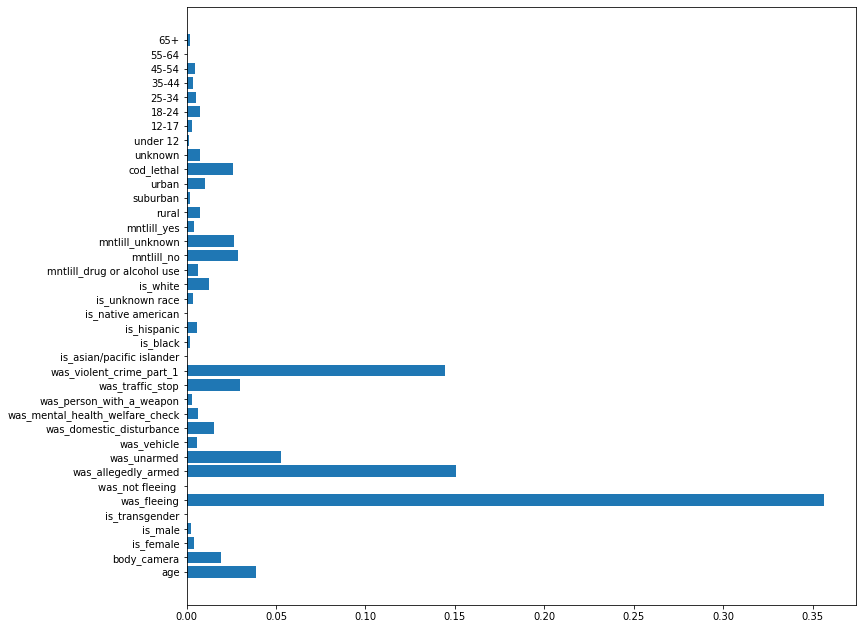

In [68]:
feature_names = list(train2.columns)

plt.figure(figsize=(12, 11))
plt.barh(feature_names, rf.feature_importances_)



### Top Features according to Random Forest: (ordered greatest to least)
was_fleeing<br>
was_allegedly_armed<br>
was_violent_crime<br>
was_unarmed<br>
age


In [30]:
train2.columns

Index(['age', 'body_camera', 'is_female', 'is_male', 'is_transgender',
       'was_fleeing', 'was_not fleeing ', 'was_allegedly_armed', 'was_unarmed',
       'was_vehicle', 'was_domestic_disturbance',
       'was_mental_health_welfare_check', 'was_person_with_a_weapon',
       'was_traffic_stop', 'was_violent_crime_part_1',
       'is_asian/pacific islander', 'is_black', 'is_hispanic',
       'is_native american', 'is_unknown race', 'is_white',
       'mntlill_drug or alcohol use', 'mntlill_no', 'mntlill_unknown',
       'mntlill_yes', 'rural', 'suburban', 'urban', 'cod_lethal', 'unknown',
       'under 12', '12-17', '18-24', '25-34', '35-44', '45-54', '55-64',
       '65+'],
      dtype='object')

In [31]:
# make predictions
y_pred = rf.predict(train2)

# estimate probability
y_pred_proba = rf.predict_proba(train2)


#Compute accuracy
train_accuracy = round(rf.score(train2, y_train),2)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(train2, y_train)))


Accuracy of random forest classifier on training set: 0.70


In [32]:
# run classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.70      0.71      2466
         1.0       0.70      0.70      0.70      2368

    accuracy                           0.70      4834
   macro avg       0.70      0.70      0.70      4834
weighted avg       0.70      0.70      0.70      4834



In [33]:
# fit the model on validate
rf.fit(validate2, y_validate)

# make predictions
y_pred_val = rf.predict(validate2)

# estimate probability
y_pred_val_proba = rf.predict_proba(validate2)

#Compute accuracy
validate_accuracy = round(rf.score(validate2, y_validate),2)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(validate2, y_validate)))


Accuracy of random forest classifier on validate set: 0.72


In [34]:
# run classification report on validate
print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      1053
         1.0       0.71      0.71      0.71      1020

    accuracy                           0.72      2073
   macro avg       0.72      0.72      0.72      2073
weighted avg       0.72      0.72      0.72      2073



In [35]:
def get_metrics_bin(clf, X, y):
    '''
    get_metrics_bin will take in a sklearn classifier model, an X and a y variable and utilize
    the model to make a prediction and then gather accuracy, class report evaluations

    return:  a classification report as a pandas DataFrame
    '''
    y_pred = clf.predict(X)
    accuracy = clf.score(X, y)
    conf = confusion_matrix(y, y_pred)
    class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [36]:
# X = validate2
# clf = RandomForestClassifier
# print('Model #1: min samples 3, max depth 3')
# class_report_val = get_metrics_bin(clf, validate2, y_validate)
# # print('-------------------------------------------\n Model #2: min samples 3, max_depth 3\n')
# # class_report_val1 = get_metrics_bin(clf1, X_val, y_val)

### Takeaways on Random Forest Classifier Model (max depth 3):

Baseline accuracy = 51% <br>
Accuracy on Train = 70% <br>
Accuracy on Validate = 72%

In [37]:

#begin building a dataframe to record accuracy
metric_df = pd.DataFrame(data=[{
    'model': 'random forest', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(train_accuracy, 2),
    'validate_accuracy': round(validate_accuracy, 2)}])
metric_df

,model,baseline_accuracy,train_accuracy,validate_accuracy
0,random forest,0.51,0.7,0.72


### Naive Bayes
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object. It's biggest limitation is that it implicitly assumes that all the attributes are mutually independent. (In real life, it's almost impossible that we get a set of predictors that are completely independent or one another.)

In [38]:
from sklearn.naive_bayes import CategoricalNB

# make the model
classifier = CategoricalNB()

# fit the model
classifier.fit(train2, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


CategoricalNB()

In [39]:
# make predictions on train
nb_y_pred  =  classifier.predict(train2)

# make predictions on validate
nb_y_val_pred  =  classifier.predict(validate2)

In [40]:
# evaluate model on train
from sklearn.metrics import confusion_matrix,accuracy_score
cm_train = confusion_matrix(y_train, nb_y_pred)
ac_train = accuracy_score(y_train,nb_y_pred)

In [41]:
# evaluate model on validate
cm_validate = confusion_matrix(y_validate, nb_y_val_pred)
ac_validate = accuracy_score(y_validate,nb_y_val_pred)

In [42]:
print('Accuracy of Naive Bayes Gaussian Classifier on train set: {:.2f}'.format(ac_train))
print('Accuracy of Naive Bayes Gaussian Classifier on validate set: {:.2f}'.format(ac_validate))

Accuracy of Naive Bayes Gaussian Classifier on train set: 0.70
Accuracy of Naive Bayes Gaussian Classifier on validate set: 0.68


### Takeaways on Naive Bayes Model:
Baseline accuracy = 51% <br>
Accuracy on Train = 70% <br>
Accuracy on Validate = 68%

### Dataframe Summarizing Models

In [43]:
# append dataframe to record accuracy on Naive Bayes
metric_df = metric_df.append({
    'model': 'naive bayes', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(ac_train, 2),
    'validate_accuracy':round(ac_validate,2)}, ignore_index=True)
  


metric_df

,model,baseline_accuracy,train_accuracy,validate_accuracy
0,random forest,0.51,0.7,0.72
1,naive bayes,0.51,0.7,0.68


### GridSearchCV

In [44]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [45]:
# Create a parameter dictionary for the model, {'parameter': [list of settings]}
parameters = [
    {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'shuffle': [True, False],
    'verbose': [0, 1, 5, 10],
    'class_weight': [None, 'balanced'],
    },
]
# Created variable model which holds the KNN model
model = SGDClassifier()
# Create grid_search model, looking at recall
grid_search = GridSearchCV(model,
                           param_grid=parameters,
                           scoring='accuracy',
                           )
# Create variable r that hold the FIT grid_search
r = grid_search.fit(X_train[f_feature], y_train)
scores = r.cv_results_
lm = r.best_estimator_

Norm: 0.21, NNZs: 15, Bias: 0.670990, T: 34803, Avg. loss: 0.967760
Total training time: 0.08 seconds.
-- Epoch 10
Norm: 0.21, NNZs: 15, Bias: 0.669549, T: 38670, Avg. loss: 0.963642
Total training time: 0.08 seconds.
-- Epoch 11
Norm: 0.21, NNZs: 15, Bias: 0.668289, T: 42537, Avg. loss: 0.972609
Total training time: 0.08 seconds.
-- Epoch 12
Norm: 0.21, NNZs: 15, Bias: 0.666853, T: 46404, Avg. loss: 0.965811
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 0.22, NNZs: 15, Bias: 0.666050, T: 50271, Avg. loss: 0.962365
Total training time: 0.08 seconds.
Convergence after 13 epochs took 0.08 seconds
-- Epoch 1
Norm: 0.17, NNZs: 15, Bias: 0.373963, T: 3867, Avg. loss: 1.878961
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.19, NNZs: 15, Bias: 0.361835, T: 7734, Avg. loss: 1.009328
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 15, Bias: 0.355566, T: 11601, Avg. loss: 0.985802
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.20, NNZs: 15, Bias: 0.352021, T:

In [46]:
# Returns max value of the mean test score 
max(scores['mean_test_score'])

0.6814191294070796

In [47]:
# loop that runs all of the possible parameter configurations from the parameter dictionary above
for mean_score, params in sorted(list(zip(scores["mean_test_score"], scores["params"])),key = lambda x: x[0]):
     print(f'Best parameters for SGD Classifier are {params} with a score of {mean_score}')

Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 0} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 1} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 5} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 10} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 5} with a score of 0.515718931788353
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': False, 'verbose': 0} with a score of 0.5208872074525597
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': False, 'verbose': 1} with a score of 0.52088720745

Best parameters for SGD Classifier are {'alpha': 0.01, 'class_weight': None, 'shuffle': True, 'verbose': 5} using f_feature from Select K Best


In [48]:
# Create a parameter dictionary for the model, {'parameter': [list of settings]}
parameters = [
    {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'shuffle': [True, False],
    'verbose': [0, 1, 5, 10],
    'class_weight': [None, 'balanced'],
    },
]
# Created variable model which holds the KNN model
model = SGDClassifier()
# Create grid_search model, looking at recall
grid_search = GridSearchCV(model,
                           param_grid=parameters,
                           scoring='accuracy',
                           )
# Create variable r that hold the FIT grid_search
r = grid_search.fit(X_train[rfe_list], y_train)
scores = r.cv_results_
lm = r.best_estimator_

Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.23, NNZs: 15, Bias: -0.009442, T: 23202, Avg. loss: 0.945453
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 15, Bias: -0.012585, T: 27069, Avg. loss: 0.945377
Total training time: 0.02 seconds.
Convergence after 7 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.24, NNZs: 15, Bias: 0.028819, T: 3868, Avg. loss: 0.948445
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 15, Bias: 0.013260, T: 7736, Avg. loss: 0.944546
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 15, Bias: 0.004584, T: 11604, Avg. loss: 0.944139
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.24, NNZs: 15, Bias: -0.001461, T: 15472, Avg. loss: 0.943921
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.24, NNZs: 15, Bias: -0.006104, T: 19340, Avg. loss: 0.943775
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.24, NNZs: 15, Bias: -0.009876, T: 23208, Avg. loss: 0.943666
Total training time: 0.03 seconds.
-- Ep

In [49]:
# Returns max value of the mean test score 
max(scores['mean_test_score'])

0.7000376824440491

In [50]:
# loop that runs all of the possible parameter configurations from the parameter dictionary above
for mean_score, params in sorted(list(zip(scores["mean_test_score"], scores["params"])),key = lambda x: x[0]):
     print(f'Best parameters for SGD Classifier are {params} with a score of {mean_score}')

Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 0} with a score of 0.5020661112788265
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 5} with a score of 0.5055821402343591
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 10} with a score of 0.5059957906997159
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 1} with a score of 0.5101365774491983
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 5} with a score of 0.5196462560564894
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 1} with a score of 0.5293670419923736
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 10} with a score of 0.53269444462

Best parameters for SGD Classifier are {'alpha': 0.0001, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 1} using rfe_list froms RFE


In [51]:
# Build 2 models using Select K Best features for one and RFE Features for the other
sgd_skb = SGDClassifier(alpha=0.01, shuffle=True, verbose=5, class_weight=None)
sgd_rfe = SGDClassifier(alpha=0.0001, class_weight='balanced', shuffle=True, verbose=1)

# fitting the SGD Classifiers with the X_train with the corresponding features
sgd_skb.fit(X_train[f_feature], y_train)
sgd_rfe.fit(X_train[rfe_list], y_train)

# Model SKB predictions
y_pred_sgd_skb = sgd_skb.predict(X_train[f_feature])
y_pred_val_sgd_skb = sgd_skb.predict(X_validate[f_feature])

# Model RFE predictions
y_pred_sgd_rfe = sgd_rfe.predict(X_train[rfe_list])
y_pred_val_sgd_rfe = sgd_rfe.predict(X_validate[rfe_list])

# Measure accuracy of the select k best feature model
accuracy_train_sgd_skb = sgd_skb.score(X_train[f_feature], y_train)
accuracy_val_sgd_skb = sgd_skb.score(X_validate[f_feature], y_validate)

# Measure accuracy of the RFE feature model
accuracy_train_sgd_rfe = sgd_rfe.score(X_train[rfe_list], y_train)
accuracy_val_sgd_rfe = sgd_rfe.score(X_validate[rfe_list], y_validate)

-- Epoch 1
Norm: 8.06, NNZs: 15, Bias: -0.499480, T: 4834, Avg. loss: 36.224043
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.54, NNZs: 15, Bias: -0.249214, T: 9668, Avg. loss: 5.334911
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.49, NNZs: 15, Bias: -0.042633, T: 14502, Avg. loss: 3.342724
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.72, NNZs: 15, Bias: 0.222257, T: 19336, Avg. loss: 2.540189
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.27, NNZs: 15, Bias: 0.288737, T: 24170, Avg. loss: 2.080017
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.88, NNZs: 15, Bias: 0.306309, T: 29004, Avg. loss: 1.799878
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 3.65, NNZs: 15, Bias: 0.348118, T: 33838, Avg. loss: 1.627230
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 3.41, NNZs: 15, Bias: 0.326501, T: 38672, Avg. loss: 1.533574
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 3.18, NNZs: 15, Bias: 0.331764, T: 43506, Avg. loss: 1.418154
Total t

In [52]:
# Add accuracy of the SKB model to the metric_df
metric_df = metric_df.append({
    'model': 'SGD Classifier SKB Features', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(accuracy_train_sgd_skb, 2),
    'validate_accuracy':round(accuracy_val_sgd_skb,2)}, ignore_index=True)


In [53]:
# Add accuracy of the RFE model to the metric_df
metric_df = metric_df.append({
    'model': 'SGD Classifier RFE Features', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(accuracy_train_sgd_rfe, 2),
    'validate_accuracy':round(accuracy_val_sgd_rfe,2)}, ignore_index=True)

In [54]:
metric_df

,model,baseline_accuracy,train_accuracy,validate_accuracy
0,random forest,0.51,0.70,0.72
1,naive bayes,0.51,0.70,0.68
2,SGD Classifier SKB Features,0.51,0.70,0.71
3,SGD Classifier RFE Features,0.51,0.69,0.69


___
# KNN 
## Train

In [69]:
def get_metrics(mod, X, y):
    """
    get_metrics returns the baseline accuracy score 
    along with the current model's accuracy score for comparison 
    along with a table of precision/recall/f1-score/support percentages of the model
    """
    baseline_accuracy = (train.alleged_threat_lvl == 0).mean()
    y_pred = mod.predict(X)
    accuracy = mod.score(X, y)
    conf = confusion_matrix(y, y_pred)
    prfs = pd.DataFrame(precision_recall_fscore_support(y, y_pred), index=['precision', 'recall', 'f1-score', 'support'])
    
    print(f'''
    BASELINE accuracy is: {baseline_accuracy:.2%}
    The accuracy for our model is: {accuracy:.5%} 
    ''')
    return prfs, conf

In [70]:
# Create KNN object (thing)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[f_feature], y_train)

KNeighborsClassifier()

In [71]:
# Use the model (thing)
# Select k Best features
get_metrics(knn, train[f_feature], y_train)


    BASELINE accuracy is: 51.01%
    The accuracy for our model is: 74.18287% 
    


(                     0            1
 precision     0.761598     0.723464
 recall        0.718978     0.765625
 f1-score      0.739675     0.743947
 support    2466.000000  2368.000000,
 array([[1773,  693],
        [ 555, 1813]]))

In [72]:
# Use the model (thing)
# RFE features
get_metrics(knn, train[rfe_list], y_train)


    BASELINE accuracy is: 51.01%
    The accuracy for our model is: 48.28300% 
    


(                     0            1
 precision     0.496113     0.356522
 recall        0.879968     0.069257
 f1-score      0.634503     0.115983
 support    2466.000000  2368.000000,
 array([[2170,  296],
        [2204,  164]]))

## Validate

In [73]:
# Use the model (thing)
# Select k Best features
get_metrics(knn, validate[f_feature], y_validate)


    BASELINE accuracy is: 51.01%
    The accuracy for our model is: 65.60540% 
    


(                     0            1
 precision     0.665370     0.646890
 recall        0.649573     0.662745
 f1-score      0.657376     0.654722
 support    1053.000000  1020.000000,
 array([[684, 369],
        [344, 676]]))

In [74]:
# Use the model (thing)
# RFE features
get_metrics(knn, validate[rfe_list], y_validate)


    BASELINE accuracy is: 51.01%
    The accuracy for our model is: 48.67342% 
    


(                     0            1
 precision     0.497104     0.373563
 recall        0.896486     0.063725
 f1-score      0.639566     0.108878
 support    1053.000000  1020.000000,
 array([[944, 109],
        [955,  65]]))

**KNN using Select K best is running best with Train=74% & Validate=66%**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>